<a href="https://colab.research.google.com/github/Disaster9173/Project-ORDII/blob/main/Project_%D0%A1%D1%83%D0%BB%D1%82%D0%B0%D0%BD%D0%B3%D0%B5%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#настройка стиля графиков для лучшей читаемости
sns.set_style("whitegrid")
#установка порога для отображения всех столбцов
pd.set_option('display.max_columns', None)

#1.загрузка данных
try:
    df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
    print("Датасет успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'Sleep_health_and_lifestyle_dataset.csv' не найден. Убедитесь, что файл находится в той же директории или укажите полный путь.")

#2.первые/последние строки
print("\nПервые 5 строк датасета:")
print(df.head())

#3.структура данных (количество строк/столбцов)
print("\n## 📊 Структура данных:")
print(f"Количество строк: {df.shape[0]}, Количество столбцов: {df.shape[1]}")

#4.проверка типов данных
print("\nТипы данных и пропуски (info):")
df.info()

#5.приведение типов (пример)
#'Experience' может содержать пропуски (NaN - float), поэтому переводим в Int64
try:
    df['Experience'] = df['Experience'].astype('Int64', errors='ignore')
    print("\nСтолбец 'Experience' приведен к типу Int64.")
except:
    pass #пропускаем, если столбца нет в демонстрационном наборе

Датасет успешно загружен.

Первые 5 строк датасета:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200

In [ ]:
missing_counts = df.isnull().sum()

print("Количество пропущенных значений в каждом столбце:")
print(missing_counts)

#процент пропущенных значений
print("\nПроцент пропущенных значений в каждом столбце:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.round(2).astype(str) + '%')

Количество пропущенных значений в каждом столбце:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Процент пропущенных значений в каждом столбце:
Person ID                    0.0%
Gender                       0.0%
Age                          0.0%
Occupation                   0.0%
Sleep Duration               0.0%
Quality of Sleep             0.0%
Physical Activity Level      0.0%
Stress Level                 0.0%
BMI Category                 0.0%
Blood Pressure               0.0%
Heart Rate                   0.0%
Daily Steps                  0.0%
Sleep Disorder             58.56%
dtype: object


B. Обработка данных

Пропущенные значения

In [ ]:
print("\n--- Reconfirming Missing Values ---")

# Calculate the total count of missing values for each column
missing_counts_reconfirm = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage_reconfirm = (df.isnull().sum() / len(df)) * 100

print("\nUpdated count of missing values in each column:")
print(missing_counts_reconfirm)

print("\nUpdated percentage of missing values in each column:")
print(missing_percentage_reconfirm.round(2).astype(str) + '%')


--- Reconfirming Missing Values ---

Updated count of missing values in each column:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Updated percentage of missing values in each column:
Person ID                    0.0%
Gender                       0.0%
Age                          0.0%
Occupation                   0.0%
Sleep Duration               0.0%
Quality of Sleep             0.0%
Physical Activity Level      0.0%
Stress Level                 0.0%
BMI Category                 0.0%
Blood Pressure               0.0%
Heart Rate                   0.0%
Daily Steps                  0.0%
Sleep Disorder             58.56%
dt

In [ ]:
print("\n--- Удаление пустых колонок ---")
initial_cols = df.shape[1]
df_cleaned_cols = df.dropna(axis=1, how='all')
dropped_cols_count = initial_cols - df_cleaned_cols.shape[1]
if dropped_cols_count > 0:
    print(f"Удалено {dropped_cols_count} пустых колон.")
else:
    print("Не найдено пустых колон для удаления.")
df = df_cleaned_cols.copy()

print("\n--- Удаление строк с пустыми значения ---")
initial_rows = df.shape[0]
df_cleaned_rows = df.dropna(axis=0, how='any')
dropped_rows_count = initial_rows - df_cleaned_rows.shape[0]
if dropped_rows_count > 0:
    print(f"Удалено {dropped_rows_count} строк.")
else:
    print("Не найдено строк с пустыми значениями.")
df = df_cleaned_rows.copy()

print("\nИзменённый датафрейм")
print(df.shape)


--- Удаление пустых колонок ---
Не найдено пустых колон для удаления.

--- Удаление строк с пустыми значения ---
Удалено 219 строк.

Изменённый датафрейм
(155, 13)


Дубликаты

In [ ]:
print("\n--- Проверка и удаление дубликатов ---")

# Найти дубликаты
duplicates = df.duplicated()

# Посчитать количество дублирующихся строк
num_duplicates = duplicates.sum()

print(f"Количество дублирующихся строк: {num_duplicates}")

if num_duplicates > 0:
    # Удалить дубликаты
    initial_rows = df.shape[0]
    df = df.drop_duplicates()
    final_rows = df.shape[0]
    print(f"Удалено {initial_rows - final_rows} дублирующихся строк.")
    print("Дубликаты успешно удалены.")
else:
    print("Дубликаты не найдены.")

print("\nНовый размер DataFrame после удаления дубликатов:")
print(df.shape)

print("\nПервые 5 строк DataFrame после удаления дубликатов:")
print(df.head())



--- Проверка и удаление дубликатов ---
Количество дублирующихся строк: 0
Дубликаты не найдены.

Новый размер DataFrame после удаления дубликатов:
(155, 13)

Первые 5 строк DataFrame после удаления дубликатов:
    Person ID  Gender  Age            Occupation  Sleep Duration  \
3           4    Male   28  Sales Representative             5.9   
4           5    Male   28  Sales Representative             5.9   
5           6    Male   28     Software Engineer             5.9   
6           7    Male   29               Teacher             6.3   
16         17  Female   29                 Nurse             6.5   

    Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
3                  4                       30             8          Obese   
4                  4                       30             8          Obese   
5                  4                       30             8          Obese   
6                  6                       40             7          

Выбросы (при необходимости)

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Z-score and boxplot:")
print(numerical_cols)

Z-score and boxplot:
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


z-score


In [ ]:
outliers_zscore = {}

for col in numerical_cols:
    # Calculate Z-scores
    mean_val = df[col].mean()
    std_val = df[col].std()

    # Avoid division by zero if std_val is 0
    if std_val == 0:
        outliers_zscore[col] = 0
        print(f"Колоны '{col}': Стандартное отклонение равно нулю, выбросы не обнаружены.")
        continue

    z_scores = (df[col] - mean_val) / std_val

    # Identify outliers based on |Z-score| > 3
    outlier_count = df[z_scores.abs() > 3].shape[0]

    outliers_zscore[col] = outlier_count
    print(f"Колоны '{col}': {outlier_count} выбросы, идентифицируемые с Z-score > 3.")

print("\nСумма выбросов Z-score:")
for col, count in outliers_zscore.items():
    print(f"{col}: {count} выбросов")

Колоны 'Person ID': 0 выбросы, идентифицируемые с Z-score > 3.
Колоны 'Age': 0 выбросы, идентифицируемые с Z-score > 3.
Колоны 'Sleep Duration': 0 выбросы, идентифицируемые с Z-score > 3.
Колоны 'Quality of Sleep': 0 выбросы, идентифицируемые с Z-score > 3.
Колоны 'Physical Activity Level': 0 выбросы, идентифицируемые с Z-score > 3.
Колоны 'Stress Level': 0 выбросы, идентифицируемые с Z-score > 3.
Колоны 'Heart Rate': 0 выбросы, идентифицируемые с Z-score > 3.
Колоны 'Daily Steps': 0 выбросы, идентифицируемые с Z-score > 3.

Сумма выбросов Z-score:
Person ID: 0 выбросов
Age: 0 выбросов
Sleep Duration: 0 выбросов
Quality of Sleep: 0 выбросов
Physical Activity Level: 0 выбросов
Stress Level: 0 выбросов
Heart Rate: 0 выбросов
Daily Steps: 0 выбросов


Boxplot

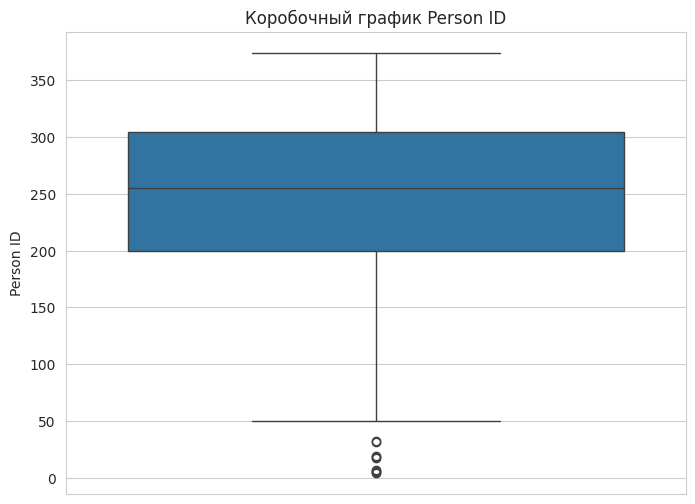

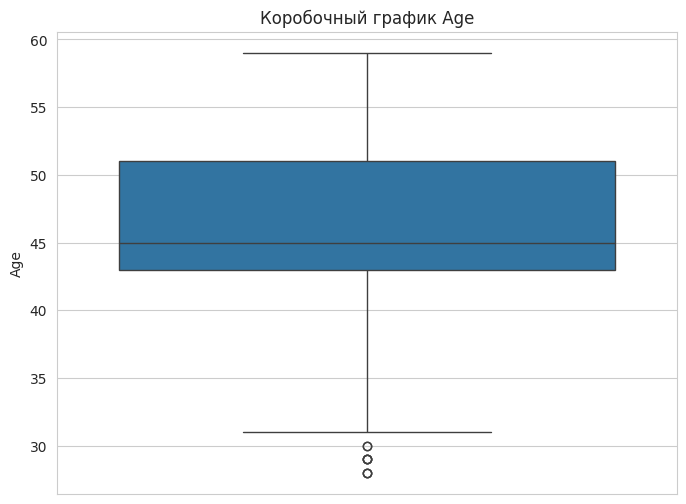

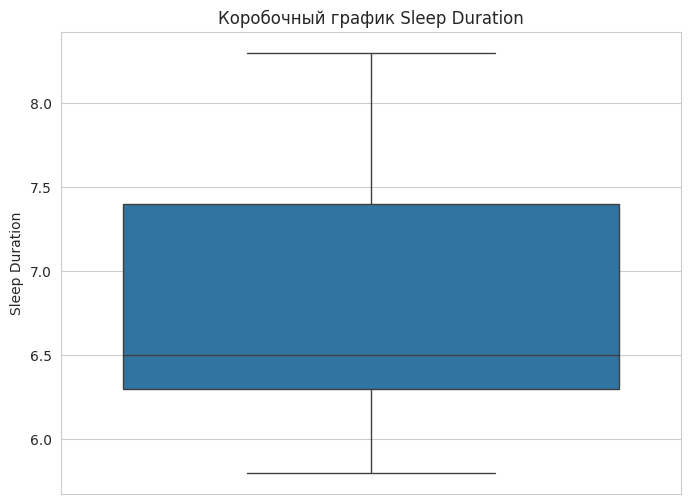

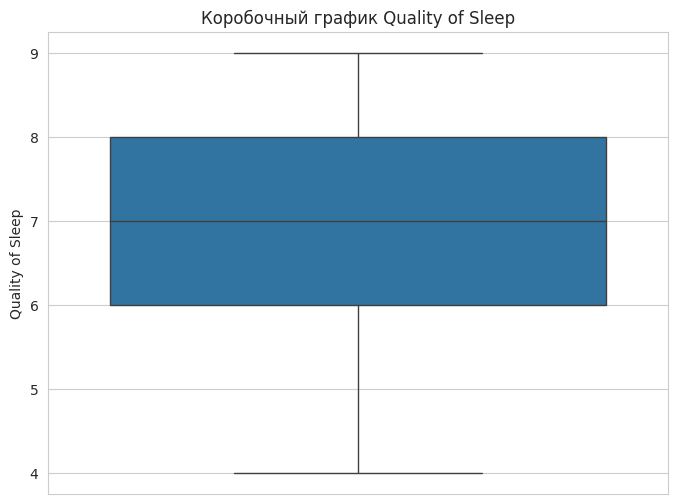

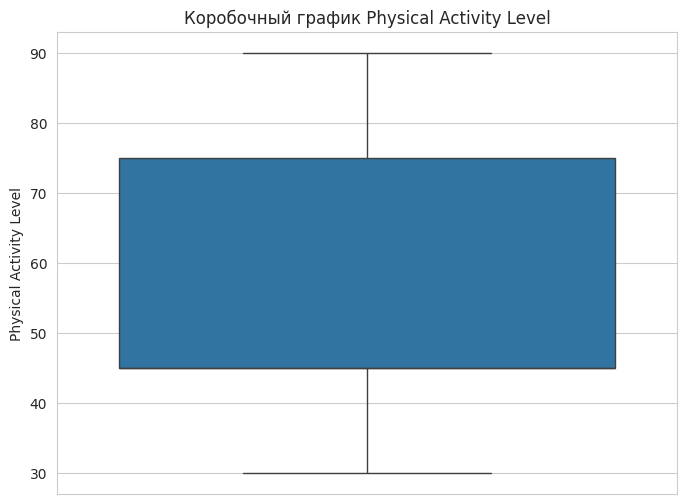

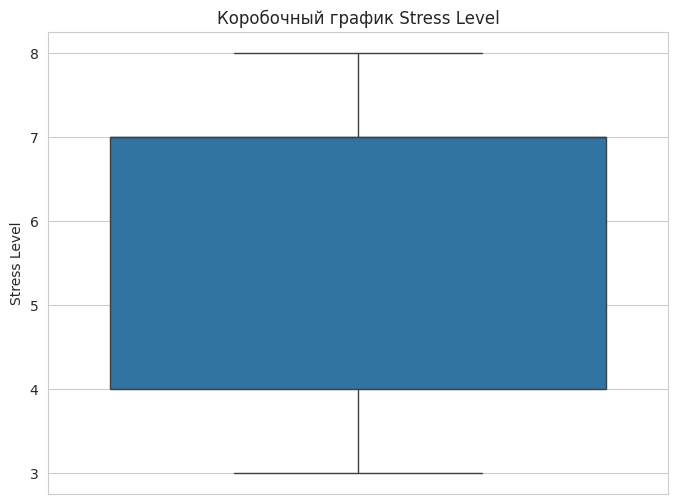

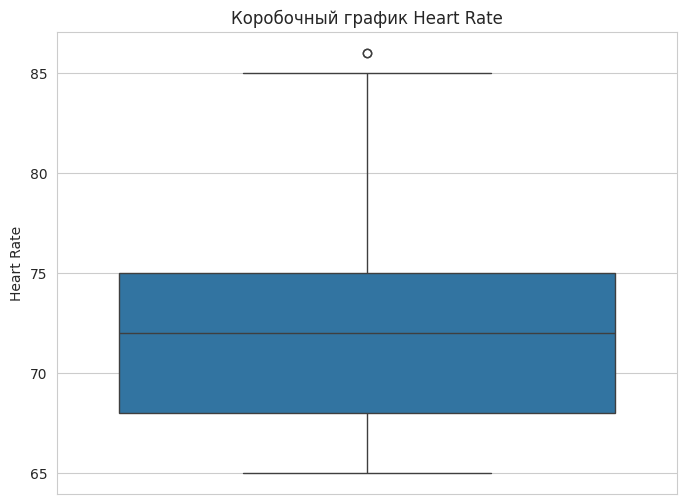

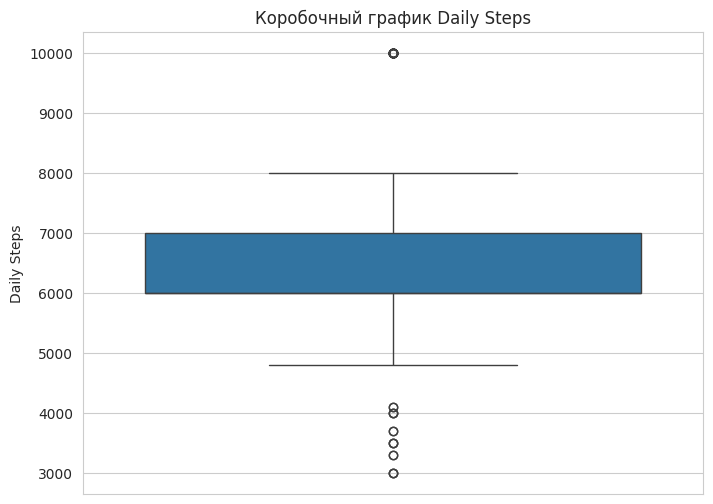

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Коробочный график {col}')
    plt.ylabel(col)
    plt.show()

Статистики данных:

### Описательная статистика

Используем метод `.describe()` для получения основных статистических показателей для числовых столбцов DataFrame. Это включает количество, среднее значение, стандартное отклонение, минимальное и максимальное значения, а также квартили.

In [ ]:
print("\n--- Описательная статистика DataFrame ---")
display(df.describe())


--- Описательная статистика DataFrame ---


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,244.761290,46.632258,6.812258,6.870968,60.896774,5.767742,71.787097,6765.806452
std,91.282997,7.839311,0.773534,1.337325,20.634158,1.946757,5.187381,1893.921881
min,4.000000,28.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,199.500000,43.000000,6.300000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,255.000000,45.000000,6.500000,7.000000,45.000000,7.000000,72.000000,6000.000000
75%,304.500000,51.000000,7.400000,8.000000,75.000000,7.000000,75.000000,7000.000000
max,374.000000,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Уникальные значения и частоты

Проанализируем уникальные значения и их частоты для категориальных столбцов. Это поможет понять распределение данных и выявить потенциальные аномалии или ошибки ввода.

In [ ]:
print("\n--- Уникальные значения и частоты для категориальных столбцов ---")

categorical_cols = df.select_dtypes(include='object').columns.tolist()

if not categorical_cols:
    print("В DataFrame нет столбцов типа 'object'.")
else:
    for col in categorical_cols:
        print(f"\nУникальные значения и их частоты для столбца '{col}':")
        display(df[col].value_counts())



--- Уникальные значения и частоты для категориальных столбцов ---

Уникальные значения и их частоты для столбца 'Gender':


,count
Gender,
Female,103
Male,52



Уникальные значения и их частоты для столбца 'Occupation':


,count
Occupation,
Nurse,64
Teacher,31
Salesperson,30
Doctor,7
Accountant,7
Engineer,6
Lawyer,5
Sales Representative,2
Scientist,2



Уникальные значения и их частоты для столбца 'BMI Category':


,count
BMI Category,
Overweight,129
Normal,12
Obese,10
Normal Weight,4



Уникальные значения и их частоты для столбца 'Blood Pressure':


,count
Blood Pressure,
140/95,60
130/85,45
135/90,25
140/90,4
132/87,3
120/80,2
131/86,2
125/80,2
130/86,2



Уникальные значения и их частоты для столбца 'Sleep Disorder':


,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


### Корреляционный анализ

Проведем корреляционный анализ для числовых столбцов DataFrame, чтобы выявить взаимосвязи между переменными. Это поможет понять, как изменения в одной переменной влияют на другие.

In [ ]:
print("\n--- Корреляционная матрица ---")
display(df.corr(numeric_only=True))


--- Корреляционная матрица ---


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.981739,0.465877,0.661836,0.573090,-0.417244,-0.409011,0.447782
Age,0.981739,1.000000,0.550193,0.710221,0.604725,-0.452398,-0.373515,0.434277
Sleep Duration,0.465877,0.550193,1.000000,0.916748,0.240760,-0.848873,-0.337888,-0.194249
Quality of Sleep,0.661836,0.710221,0.916748,1.000000,0.352021,-0.872084,-0.534720,0.025166
Physical Activity Level,0.573090,0.604725,0.240760,0.352021,1.000000,-0.026627,0.101348,0.780685
Stress Level,-0.417244,-0.452398,-0.848873,-0.872084,-0.026627,1.000000,0.598860,0.285082
Heart Rate,-0.409011,-0.373515,-0.337888,-0.534720,0.101348,0.598860,1.000000,-0.133465
Daily Steps,0.447782,0.434277,-0.194249,0.025166,0.780685,0.285082,-0.133465,1.000000


C. Визуализация данных


Гистограммы ключевых числовых распределений


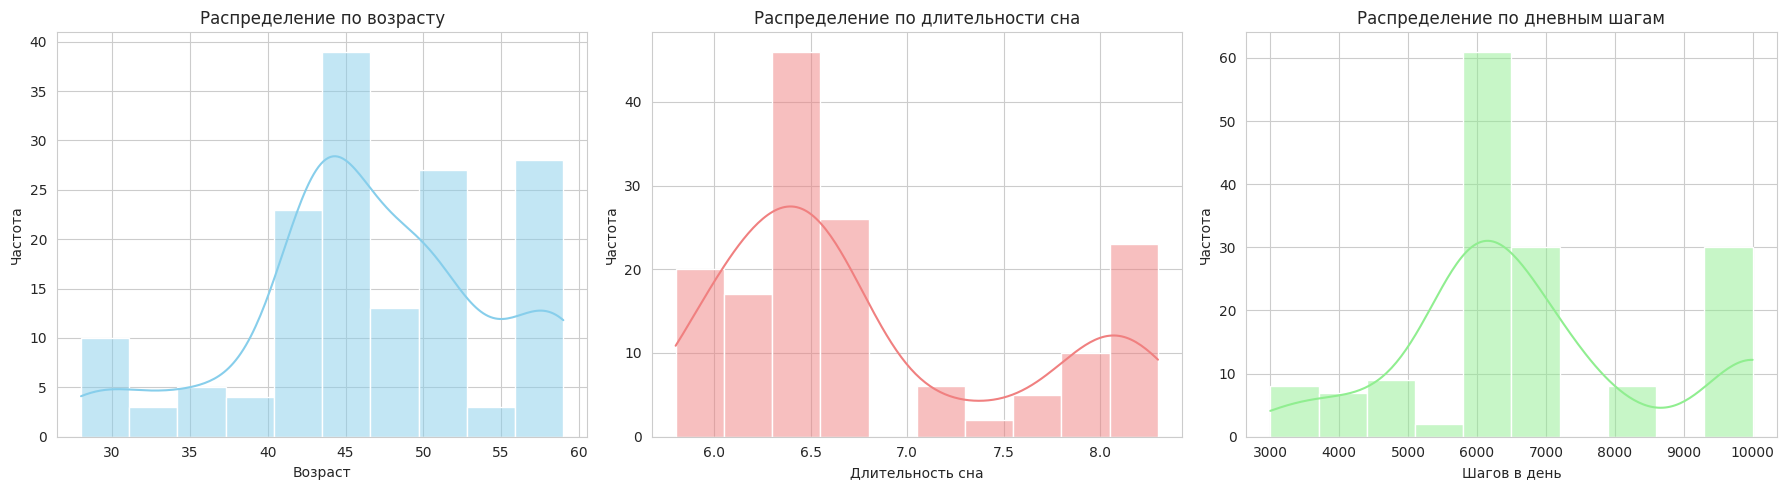

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5)) # Adjust figure size for better readability


plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st subplot
sns.histplot(df['Age'], kde=True, bins=10, color='skyblue')
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')


plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd subplot
sns.histplot(df['Sleep Duration'], kde=True, bins=10, color='lightcoral')
plt.title('Распределение по длительности сна')
plt.xlabel('Длительность сна')
plt.ylabel('Частота')


plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd subplot
sns.histplot(df['Daily Steps'], kde=True, bins=10, color='lightgreen')
plt.title('Распределение по дневным шагам')
plt.xlabel('Шагов в день')
plt.ylabel('Частота')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

Линейный график средней продолжительности сна в зависимости от возраста


--- Вычисление средней длительности сна ---

--- Отображение средней длительности сна ---


,Age,Sleep Duration
0,28,5.900000
1,29,6.325000
2,30,6.400000
3,31,7.700000
4,33,6.000000
5,34,5.800000
6,35,7.400000
7,36,6.900000
8,38,7.250000
9,39,6.850000


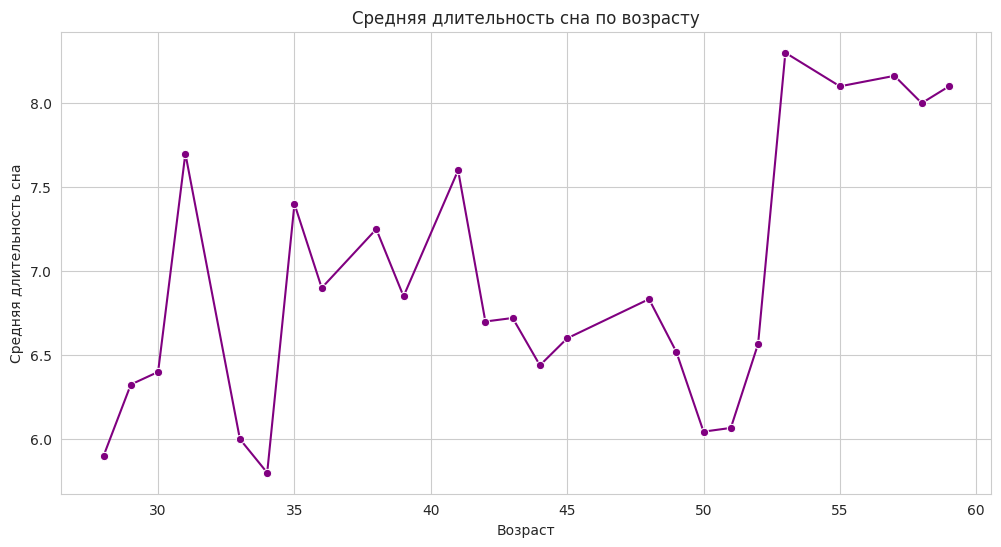

In [ ]:
print("\n--- Вычисление средней длительности сна ---")
avg_sleep_duration_by_age = df.groupby('Age')['Sleep Duration'].mean().reset_index()

print("\n--- Отображение средней длительности сна ---")
display(avg_sleep_duration_by_age)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Sleep Duration', data=avg_sleep_duration_by_age, marker='o', color='purple')
plt.title('Средняя длительность сна по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Средняя длительность сна')
plt.grid(True)
plt.show()

Столбчатые диаграммы категориальных данных и агрегированных показателей


--- Расчет средней продолжительности сна в зависимости от рода занятий ---


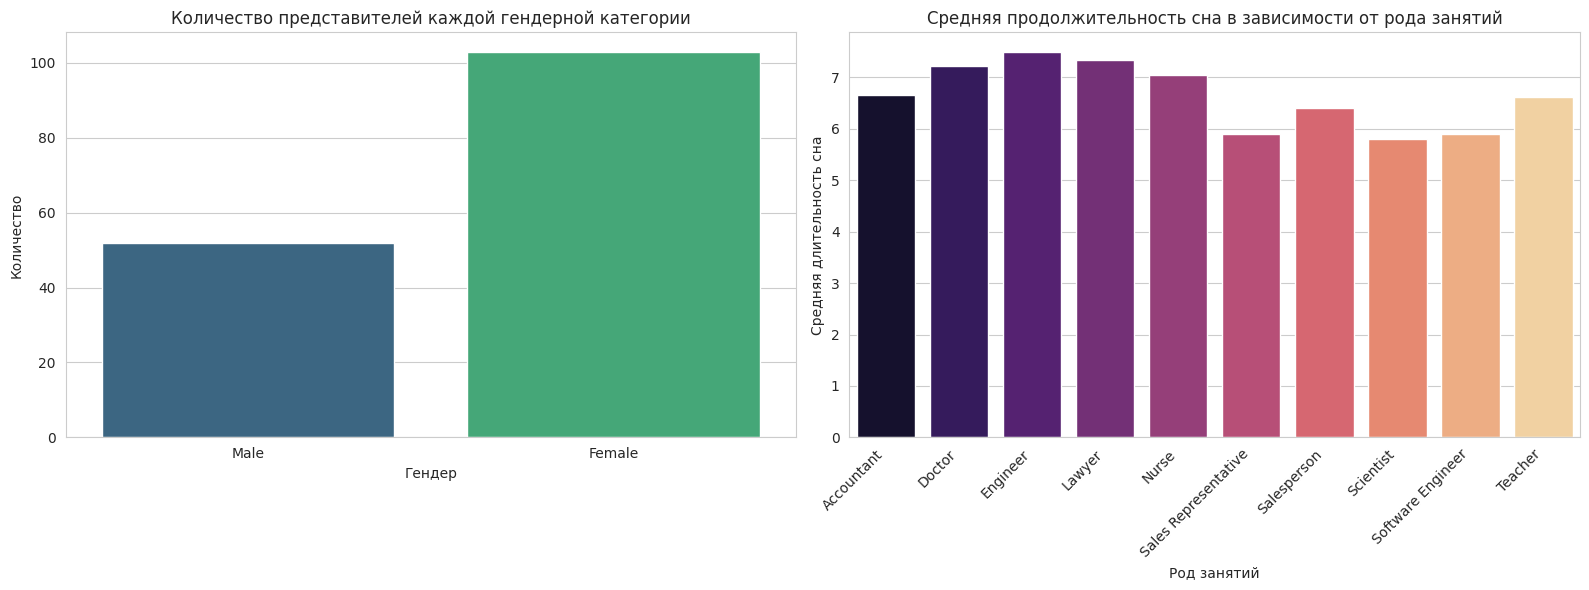

In [ ]:
print("\n--- Расчет средней продолжительности сна в зависимости от рода занятий ---")
avg_sleep_duration_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()

plt.figure(figsize=(16, 6)) # Adjust figure size for better readability

# Bar chart for 'Gender' count
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.countplot(x='Gender', data=df, palette='viridis', hue='Gender', legend=False)
plt.title('Количество представителей каждой гендерной категории')
plt.xlabel('Гендер')
plt.ylabel('Количество')

# Bar chart for average 'Sleep Duration' by 'Occupation'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Occupation', y='Sleep Duration', data=avg_sleep_duration_by_occupation, palette='magma', hue='Occupation', legend=False)
plt.title('Средняя продолжительность сна в зависимости от рода занятий')
plt.xlabel('Род занятий')
plt.ylabel('Средняя длительность сна')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

График продолжительности сна в разбивке по категориям ИМТ


--- График продолжительности сна в разбивке по категориям ИМТ ---


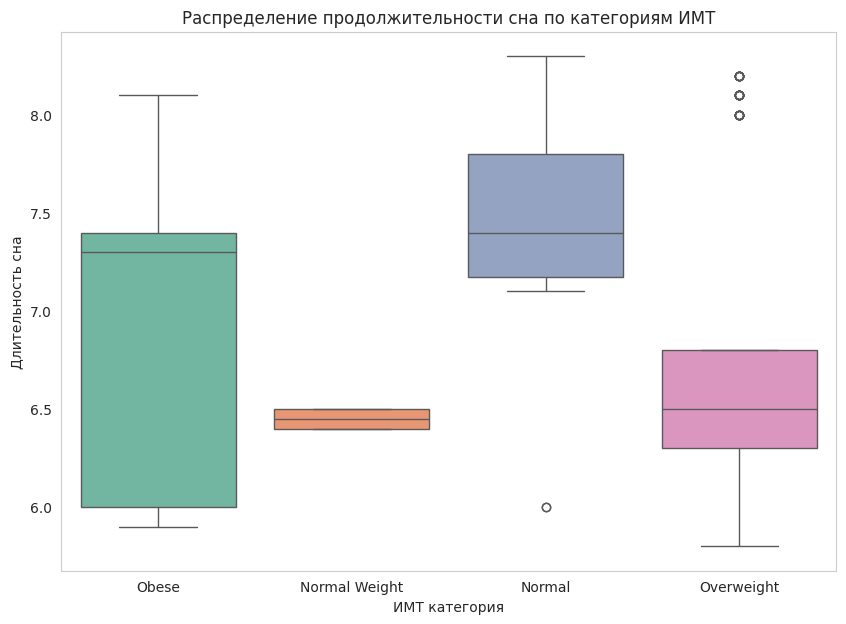

In [ ]:
print("\n--- График продолжительности сна в разбивке по категориям ИМТ ---")
plt.figure(figsize=(10, 7))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, palette='Set2', hue='BMI Category', legend=False)
plt.title('Распределение продолжительности сна по категориям ИМТ')
plt.xlabel('ИМТ категория')
plt.ylabel('Длительность сна')
plt.grid(axis='y')
plt.show()

Тепловая карта корреляции числовых столбцов


--- Корреляционая тепловая карта ---


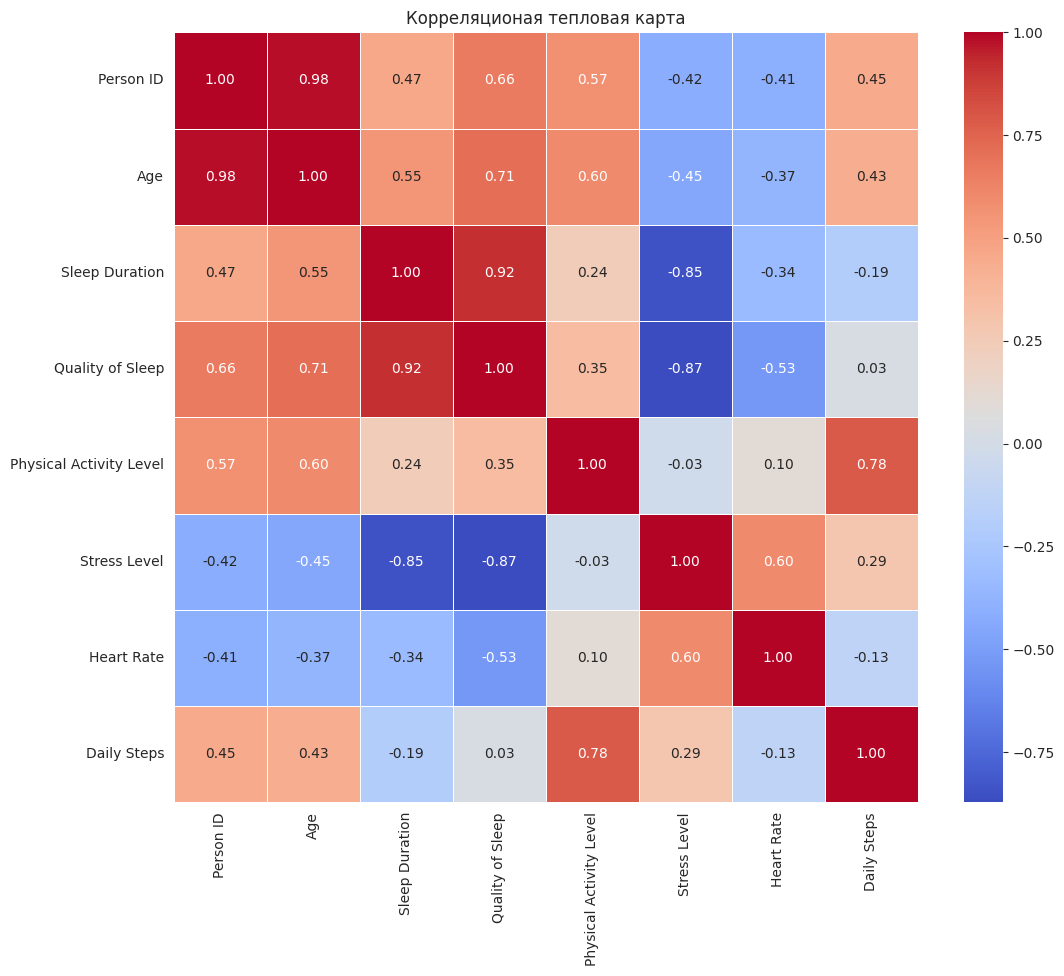

In [ ]:
print("\n--- Корреляционая тепловая карта ---")

numerical_df = df.select_dtypes(include=[np.number])

if not numerical_df.empty:
    correlation_matrix = numerical_df.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Корреляционая тепловая карта')
    plt.show()
else:
    print("Не найднено колон, для создания тепловой карты.")

D. Группировки и агрегации

Среднее / Медиана по группам: Продолжительность сна по роду занятий

In [ ]:
print("\n--- Среднее и медианное значение продолжительности сна по роду занятий ---")
sleep_agg_occupation = df.groupby('Occupation')['Sleep Duration'].agg(['mean', 'median'])
display(sleep_agg_occupation)


--- Среднее и медианное значение продолжительности сна по роду занятий ---


,mean,median
Occupation,,
Accountant,6.657143,6.60
Doctor,7.214286,7.30
Engineer,7.500000,7.80
Lawyer,7.340000,7.40
Nurse,7.040625,6.45
Sales Representative,5.900000,5.90
Salesperson,6.400000,6.40
Scientist,5.800000,5.80
Software Engineer,5.900000,5.90


Подсчёт количества: Распределение категорий ИМТ по полу

In [ ]:
print("\n--- Подсчет количества BMI Categories по Gender ---")
bmi_gender_counts = df.groupby('Gender')['BMI Category'].value_counts().unstack(fill_value=0)
display(bmi_gender_counts)


--- Подсчет количества BMI Categories по Gender ---


BMI Category,Normal,Normal Weight,Obese,Overweight
Gender,,,,
Female,3,4,1,95
Male,9,0,9,34


Суммирование: Общее количество шагов по возрастной группе

In [ ]:
print("\n--- Суммирование ежедневных шагов по возрасту ---")
# Для демонстрации создадим возрастные группы
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 100], labels=['18-29', '30-44', '45-59', '60+'])
daily_steps_by_age_group = df.groupby('Age Group')['Daily Steps'].sum().reset_index()
display(daily_steps_by_age_group)


--- Суммирование ежедневных шагов по возрасту ---


/tmp/ipython-input-1239926227.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_steps_by_age_group = df.groupby('Age Group')['Daily Steps'].sum().reset_index()


,Age Group,Daily Steps
0,18-29,36700
1,30-44,450600
2,45-59,561400
3,60+,0


Построение сводной таблицы: Средний уровень стресса по полу и категории ИМТ



In [ ]:
print("\n--- Сводная таблица среднего уровня стресса по полу и категории ИМТ ---")
pivot_stress_level = df.pivot_table(values='Stress Level', index='Gender', columns='BMI Category', aggfunc='mean')
display(pivot_stress_level)


--- Сводная таблица среднего уровня стресса по полу и категории ИМТ ---


BMI Category,Normal,Normal Weight,Obese,Overweight
Gender,,,,
Female,3.666667,7.0,5.000000,5.347368
Male,5.777778,NaN,5.777778,7.000000
